In [1]:
import networkx
import numpy
import pandas
import pickle
import algos

In [217]:
#load the pickle
pickleIN = open("edges.pickle","rb") #says read it to bite
file = pickle.load(pickleIN)
pickleIN.close()

In [218]:
net = networkx.Graph()
for edge in file:
    net.add_edge(edge[0], edge[1] )#,weight = edge[2]

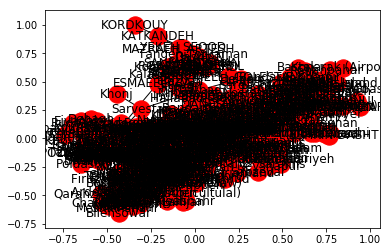

In [219]:
networkx.draw_networkx(net)

In [220]:
#label propagation
LPcommunities = networkx.algorithms.community.label_propagation_communities(net)
LPcommunities = [list(lp) for lp in list(LPcommunities)]
len(LPcommunities)

30

In [208]:
#greedy modularity
LPcommunities = networkx.algorithms.community.modularity_max.greedy_modularity_communities(net)
LPcommunities = [list(lp) for lp in list(LPcommunities)]
len(LPcommunities)

3

In [177]:
#NMF
LPcommunities = algos.NMFf(net,8)
ch = LPcommunities
names = list(net.nodes)
for u,labels in enumerate(LPcommunities):
    for uu,i in enumerate(labels):
        ch[u][uu] = names[i]
LPcommunities = ch

In [210]:
df = pandas.read_csv('PreprossecedData.csv')
df.head()

,Unnamed: 0,name,lon,lat,data,sum
0,1,Dezful (Airport),48.3831,32.3994,81,5.8
1,2,Dezful (Airport),48.3831,32.3994,82,20.0
2,4,Dezful (Airport),48.3831,32.3994,84,9.0
3,23,Dezful (Airport),48.3831,32.3994,103,7.6
4,24,Dezful (Airport),48.3831,32.3994,104,34.6


In [211]:
df = df.drop_duplicates(subset=['name'])
df = df[['name','lon','lat']]

In [212]:
df.reset_index(inplace=True,drop=True)
df.head()

,name,lon,lat
0,Dezful (Airport),48.3831,32.3994
1,Dowshan Tappeh,51.4756,35.7017
2,Hamedan (Nozheh),48.6903,35.1953
3,Khurbirjand,58.4500,32.9167
4,Konarak (Airport),60.3742,25.4364


In [213]:
df['label'] = 130

In [214]:
for i, communities in enumerate(LPcommunities):
    for city in communities:
#         df[df['name'] == city]['label'] = i
        df['label'].iloc[df[df['name'] == city].index] = i

In [215]:
df = df[df['label'] != 130]
df.head()

,name,lon,lat,label
0,Dezful (Airport),48.3831,32.3994,0
1,Dowshan Tappeh,51.4756,35.7017,0
2,Hamedan (Nozheh),48.6903,35.1953,0
3,Khurbirjand,58.4500,32.9167,0
4,Konarak (Airport),60.3742,25.4364,0


In [216]:
df.to_csv('labels.csv')